In [1]:
import pennylane as qml
from pennylane import numpy as np

### QHack Challange - Reading time as a qubit state on Bloch Sphere

In [2]:
dev = qml.device("default.qubit", wires=["hour", "minute"])

In [3]:
@qml.qnode(dev)
def time(hour, minute):
    """Generates the quantum state associated with the time passed as argument.

    Args:
        hour (int): Hour associated with the requested time
        minute (int): Minutes associated with the requested time

    Returns:
        (numpy.tensor): Probabilities associated with the state created.
    """
    theta_hour_hand = (30 * hour * (np.pi/180)) + (0.5 * minute * (np.pi/180))
    theta_min_hand = 6 * minute * (np.pi/180)
    qml.RY(-theta_hour_hand, wires="hour")
    qml.RY(-theta_min_hand, wires="minute")
    return qml.probs(wires=["hour", "minute"])

(<Figure size 400x300 with 1 Axes>, <Axes: >)

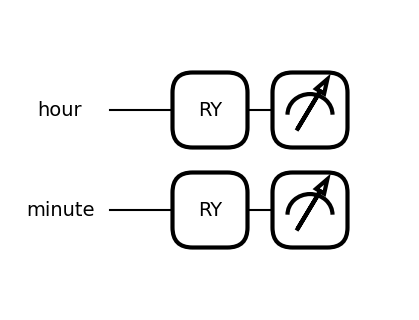

In [4]:
qml.draw_mpl(qnode=time)(1, 23)

In [5]:
time(1, 45)

tensor([0.40219036, 0.40219036, 0.09780964, 0.09780964], requires_grad=True)

In [6]:
time(1, 0)

tensor([0.9330127, 0.       , 0.0669873, 0.       ], requires_grad=True)

In [7]:
time(9, 0)   # the sample test code below for a 2-qubit state with the 0th qubit in superposition and the 1st qubit in the |0> state proves this result

tensor([0.5, 0. , 0.5, 0. ], requires_grad=True)

[0.5 0.  0.5 0. ]


(<Figure size 400x300 with 1 Axes>, <Axes: >)

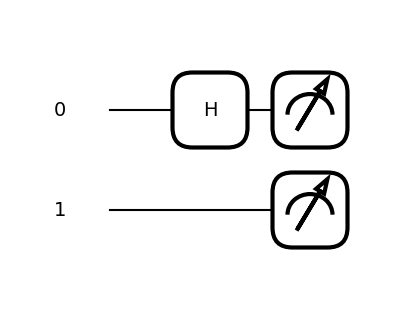

In [8]:
dev_test = qml.device("default.qubit", wires=2)

@qml.qnode(dev_test)
def test_circuit():
    qml.Hadamard(wires=0)
    # qml.Hadamard(wires=1)
    return qml.probs(wires=[0,1])

print(test_circuit())
qml.draw_mpl(test_circuit)()

In [9]:
time(3, 0)

tensor([0.5, 0. , 0.5, 0. ], requires_grad=True)

Usually sqrt(ab) is not equal to sqrt(a)*sqrt(b) when a and b are complex numbers

In [34]:
a = -1+1j
b = -1+1j
c = a*b

In [35]:
a_sqrt = np.sqrt(a)
b_sqrt = np.sqrt(b)

print(a_sqrt)
print(b_sqrt)

(0.45508986056222733+1.09868411346781j)
(0.45508986056222733+1.09868411346781j)


In [36]:
print(c)

-2j


In [37]:
d = np.sqrt(c)
print(d)

(1-1j)


In [38]:
print(a_sqrt*b_sqrt)

(-1.0000000000000002+1j)


In [42]:
import sys
sys.path.append("E:/Codes/Python")
from QuantumModules import apply_U_Gate

In [47]:
theta = 4*np.pi/3
RY = [[np.cos(theta/2), -np.sin(theta/2)], [np.sin(theta/2), np.cos(theta/2)]]
apply_U_Gate(U=RY, state=[0, 1])

array([-0.8660254, -0.5      ])

### QHack Challenge - False Proof

In [150]:
dev1= qml.device(name='default.qubit', wires=2, shots=1)
dev1.operations.add("op")
dev1.operations.add("C(op)")

@qml.qnode(device=dev1)
def circuit(U):
    """This will be the circuit you will use to determine which of the two angles we have.
    Remember that only a single shot will be executed.

    Args:
        U (qml.ops): It is the gate to discriminate between  RY(2pi/3) or RY(4pi/3).

    Returns:
        (numpy.tensor): Vector of two elements representing the output measured in each of the qubits.
    """
    # to use U,  call 'U(wires = <wire where you want to apply the gate>)'
    # to use Control-U, call 'qml.ctrl(U, control = <control wire>)(wires = <wire where you want to apply the gate>)'
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.ctrl(op=U, control=0)(wires=1)
    # return qml.state()   # set shots=None to suppress warnings when using this statement
    return qml.sample(wires=range(2))

In [167]:
def process_measurement(measurement):
    """This function processes the output of the circuit to discriminate between gates.

    Args:
        measurement (numpy.array): Output of the previous circuit a vector of dimension 2.

    Returns:
        (int): return 2 or 4 depending on the associated RY gate.
    """
    # measurement = measurement
    if all(measurement == 1):
        return 2
    else:
        return 4

In [238]:
th = 2*np.pi/3
circuit(U=qml.ctrl(op=qml.RY(th, wires=1), control=0))

ValueError: The control wires must be different from the base operation wires.

In [233]:
th = 2*np.pi/3
qml.draw_mpl(circuit())

ValueError: The control wires must be different from the base operation wires.

In [173]:
m = circuit(U='cry')
process_measurement(m)

ValueError: The object cry of type <class 'str'> is not an Operator or callable. This error might occur if you apply ctrl to a list of operations instead of a function or Operator.

In [151]:
# circuit(4*np.pi/3)

In [152]:
# circuit(2*np.pi/3) == circuit(4*np.pi/3)

In [75]:
# for _ in range(10):
#     print(circuit(4*np.pi/3))

[1 0]
[1 0]
[1 0]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 0]


In [148]:
m = circuit(2*np.pi/3)

for _ in range(100):
    print(process_measurement(m), end=' ')

2 4 4 2 2 2 2 2 2 2 4 2 2 None 4 None 2 4 2 2 2 2 2 None 4 4 4 2 None 4 2 4 None 2 4 2 4 2 2 2 2 4 2 4 2 None None 4 None None None 4 None 2 2 None 2 4 None 2 2 None 2 2 2 2 2 4 None 4 2 2 2 2 2 None 4 4 2 2 2 None None None None 2 2 None None None 2 4 None 2 2 2 2 2 4 4 

In [149]:
m1 = circuit(4*np.pi/3)

for _ in range(100):
    print(process_measurement(m1), end=' ')

2 None 2 2 4 None 2 None None None None None 4 4 None None 4 2 None None 2 None None 2 None None 2 None None None None 4 None None 2 None None None None None None None None 4 4 None None None 2 None 2 None None None 4 None None None 4 4 None 4 4 None None None None 2 None None None None None None None 4 None 2 None None 4 2 None None None None 4 None None None None None None None 4 None None None 2 None 

### QHack Challenge - AND Gate

In [207]:
d = qml.device('default.qubit', wires=3, shots=1)
@qml.qnode(device=d)
def test():
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    qml.CCZ(wires=[0,1,2])
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    return qml.sample(wires=[0,1,2])

(<Figure size 600x400 with 1 Axes>, <Axes: >)

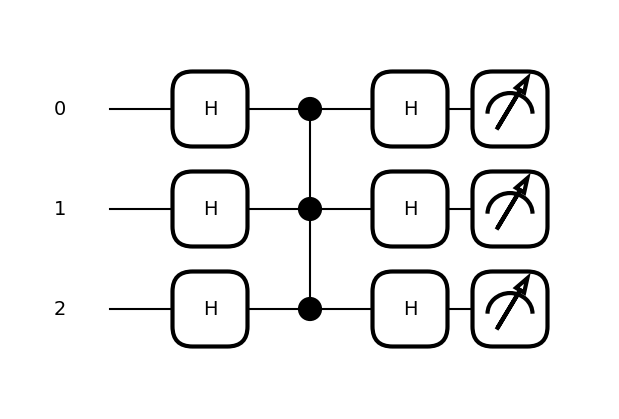

In [208]:
qml.draw_mpl(test)()

In [224]:
m = test()
for i in range(len(m)):
    print(m[i])

0
0
0


In [239]:
dev2 = qml.device("default.qubit", wires=3)

@qml.qnode(dev2)
def AND(j : int, k : int) -> list:
    """Implements the AND gate using quantum gates and computes j AND k.

    Args:
        j (int): A classical bit, either 0 or 1. 
        k (int): A classical bit, either 0 or 1. 

    Returns:
        float: The probabilities of measurement on wire 0.
    """

    if j == 1:
        qml.PauliX(wires=1)
    if k == 1:
        qml.PauliX(wires=2)

    # code here...
    qml.Hadamard(wires=0)

    qml.ctrl(qml.PauliZ, control =[1, 2])(wires = [0]) # This is not how it is allowed in the actual challenge. There, the controls have to be qubit0 and qubit1 and target qubit2

    # code here...
    qml.Hadamard(wires=0)
    
    return qml.probs(wires=0)    

In [243]:
AND(1,1)

tensor([0., 1.], requires_grad=True)

(<Figure size 600x400 with 1 Axes>, <Axes: >)

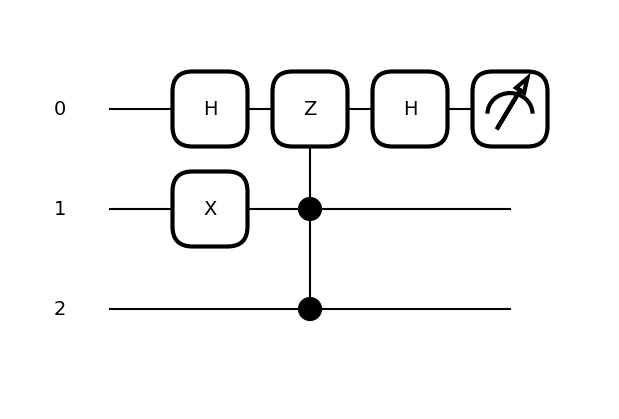

In [245]:
qml.draw_mpl(qnode=AND)(1,0)

In [270]:
@qml.qnode(device=dev2)
def and_test(j,k):   # This is what I gave in the submission. But, the previous AND function also works just as well! 
    if j == 1:
        qml.PauliX(wires=1)
    if k == 1:
        qml.PauliX(wires=2)

    qml.Hadamard(wires=0)
    # qml.CCZ(wires=[0,1,2])
    qml.ctrl(qml.PauliZ, control=[0,1])(wires=2)
    # m = qml.measure(wires=2)
    # if m == 0:
    #     print("3rd qubit is in the |0> state.")
    # else:
    #     print("3rd qubit is not in the |0> state.")
    if (j and k == 1):
        qml.PauliX(wires=2)
    qml.ctrl(qml.PauliZ, control=[1,2])(wires=0)
    qml.Hadamard(wires=0)
    return qml.probs(wires=0)

In [276]:
and_test(1,1)

tensor([0., 1.], requires_grad=True)

(<Figure size 800x400 with 1 Axes>, <Axes: >)

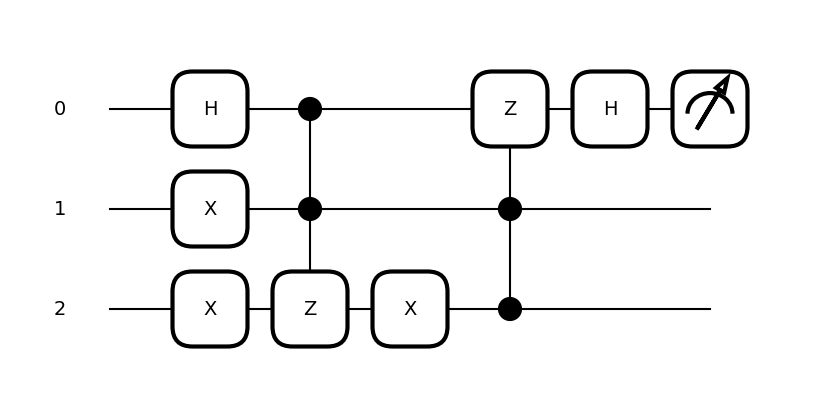

In [277]:
qml.draw_mpl(and_test)(1,1)

### QHack Challenge - 